--2021-07-14 21:53:34--  https://www.fing.edu.uy/~mfiori/FuO/A.npy
Resolving www.fing.edu.uy (www.fing.edu.uy)... 164.73.32.20
Connecting to www.fing.edu.uy (www.fing.edu.uy)|164.73.32.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2048 (2.0K)
Saving to: ‘A.npy’

A.npy               100%[===================>]   2.00K  --.-KB/s    in 0s      

2021-07-14 21:53:36 (39.4 MB/s) - ‘A.npy’ saved [2048/2048]

--2021-07-14 21:53:36--  https://www.fing.edu.uy/~mfiori/FuO/b.npy
Resolving www.fing.edu.uy (www.fing.edu.uy)... 164.73.32.20
Connecting to www.fing.edu.uy (www.fing.edu.uy)|164.73.32.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 288
Saving to: ‘b.npy’

b.npy               100%[===================>]     288  --.-KB/s    in 0s      

2021-07-14 21:53:36 (38.3 MB/s) - ‘b.npy’ saved [288/288]



El paso fijo es:  0.006395152692021134 

El punto inicial es:
 [[0.8555564  0.92841333 0.29861137 0.56788601 0.67722047 0.87388252
  0.5

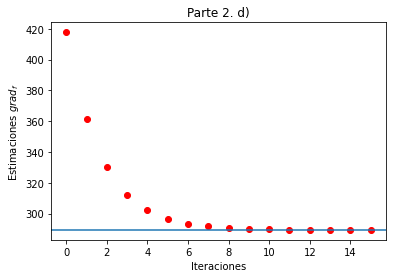

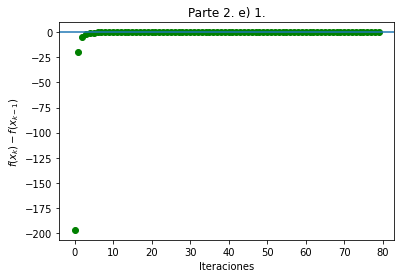

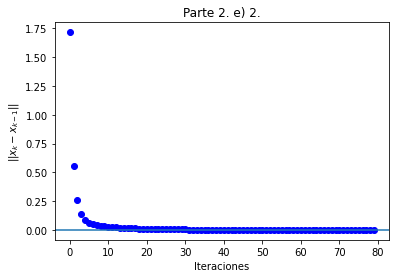

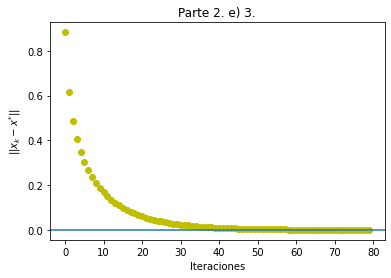

In [ ]:
#Primer obligatorio FuO
#Santiago Algorta y Carlos Gruss
#FInG UdelaR 2021
 
import numpy as np
import matplotlib.pyplot as plt
 
#f: R^n -> R
#dim(A)=p*n
#dim(x)=n
#dim(b)=p
p=20
n=12
 
#Importar matrices dadas
!wget https://www.fing.edu.uy/~mfiori/FuO/A.npy
!wget https://www.fing.edu.uy/~mfiori/FuO/b.npy
A = np.load('A.npy')
b = np.load('b.npy')
print("\n ======================================= \n")
 
#Función f
def f(x):
  return 0.5*(np.linalg.norm(np.subtract((np.dot(A,x)),b),2))**2
 
#Gradiente de f
def gradf(x):
  return np.dot(A.T, np.subtract((np.dot(A,x)),b))
 
#Cociente incremental evaluado en un punto y una dirección dadas
def ci(x,v,h):
  return ((f(np.add(x,v*h))-f(x))/h)
 
#Valores aleatorios para punto y dirección de evaluación
x = np.random.rand(n,1)
v = np.random.rand(n,1)
 
#Parte 2. d)
#Veamos que la respuesta numérica tiende a la respuesta teórica
iteraciones2d = []
estimaciones = []
 
for i in range(16):
  iteraciones2d.append(i)
  estimaciones.append(ci(x,v,1/10**(i/4)))

#Grafica calculo númerico del gradiente
plt.figure(0)
plt.plot(iteraciones2d, estimaciones, "ro")
plt.axhline(np.dot(gradf(x).T,v))
plt.xlabel("Iteraciones")
plt.ylabel("Estimaciones $grad_{f}$")
plt.title("Parte 2. d)")
plt.savefig("graf1.png")
 
#Calculemos el paso optimo
hessianaf = np.matmul(A.T, A)
vapsHess, vepsHess = np.linalg.eig(hessianaf)
m = np.min(vapsHess)
M = np.max(vapsHess)
alpha = 2/(m+M)
print("El paso fijo es: ", alpha, "\n")
 
 
#Creamos un método de descenso por gradiente por maximo descenso
def siguiente(xk):
  return xk-gradf(xk)*alpha 
 
#Defino punto de partida
actual = x
print("El punto inicial es:\n", x.T, "\n")
 
#Calculo del mínimo de f
optimo = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)),A.T),b)
print("El mínimo de f se da en:\n",optimo.T, "\n")

#Parte 2. e)
iteraciones2e = []
distfunc = []
distpuntos = []
distoptimo = []
 
for i in range(80):
  iteraciones2e.append(i)
  distfunc.append(f(siguiente(actual))-f(actual))
  distpuntos.append(np.linalg.norm((siguiente(actual)-actual),2))
  distoptimo.append(np.linalg.norm((np.subtract(siguiente(actual), optimo)),2))
  actual = siguiente(actual)

#Grafica |f(x_{k})-f(x_{k-1})|
plt.figure(1)
plt.plot(iteraciones2e, distfunc, "go")
plt.axhline(0)
plt.xlabel("Iteraciones")
plt.ylabel("$f(x_{k})-f(x_{k-1})$")
plt.title("Parte 2. e) 1.")
plt.savefig("graf2.png")
 
#Grafica ||x_{k}-x_{k-1}||
plt.figure(2)
plt.plot(iteraciones2e, distpuntos, "bo")
plt.axhline(0)
plt.xlabel("Iteraciones")
plt.ylabel("$||x_{k}-x_{k-1}||$")
plt.title("Parte 2. e) 2.")
plt.savefig("graf3.png")
 
#Grafica ||x_{k}-x*||
plt.figure(3)
plt.plot(iteraciones2e, distoptimo, "yo")
plt.axhline(0)
plt.xlabel("Iteraciones")
plt.ylabel("$||x_{k}-x^{*}||$")
plt.title("Parte 2. e) 3.")
plt.savefig("graf4.png")
 
print("\n \n")

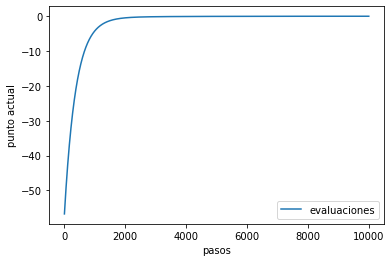

In [ ]:
##Caso 3x2
##Hecho al principio para probar cosas.
##Se puede ignorar.

A = np.array([[1,2],[0,1],[3,1]])
#print(A)

b = np.array([[1],[2],[0]])
#print(b)

#print(np.linalg.norm(b,2))

def f(x):
  return 0.5*(np.linalg.norm(np.subtract((np.dot(A,x)),b),2))**2

#print(f(np.array([[1],[2]])))

def gradf(x):
  return np.dot(A.T, np.subtract((np.dot(A,x)),b))

#print(gradf(np.array([[1],[2]])))

def ci(x,v,h):
  return ((f(np.add(x,v*h))-f(x))/h)

x = np.array([[30],[56]])
v = np.array([[2],[5]])

#print(x)
#print(v)

#print(gradf(x).T)

#print(ci(x,v,0.00000001))
#print(np.dot(gradf(x).T,v))

#cocientes = []
#for i in range(100):
#  cocientes.append((ci(x,v,1/(i+1))))

def proximo(actual, alfa):
  return actual - gradf(actual)*alfa


pasos = []
#puntosX = []
#puntosY = []

actual = x

#for i in range(100000):
#  pasos.append(i)
#  puntosX.append(proximo(actual, 0.0001)[0])
#  puntosY.append(proximo(actual, 0.0001)[1])
#  actual = proximo(actual, 0.0001)


#plt.plot(pasos, puntosX, label = 'primera coordenada')
#plt.plot(pasos, puntosY, label = 'segunda coordenada')
#plt.xlabel('pasos')
#plt.ylabel('punto actual')
#plt.legend()
#plt.show()

evaluaciones = []

for i in range(10000):
  pasos.append(i)
  evaluaciones.append(f(proximo(actual,0.0001))-f(actual))
  actual = proximo(actual, 0.0001)

plt.plot(pasos, evaluaciones, label = 'evaluaciones')
plt.xlabel('pasos')
plt.ylabel('punto actual')
plt.legend()
plt.show()